In [11]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
import src.graph as graph
import src.estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from scipy.special import expit

np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
np.random.seed(0)

sigma = -6.0  # Intercept
alpha = 0.003   # Coefficient for X
beta = 0.003

sigma = -6
alpha = 0.3
beta = 0.3

In [13]:
X1 = np.abs(np.round(np.random.normal(0, 2, 1000)))
X2 = np.abs(np.round(np.random.normal(0, 2, 1000)))
#X1 = np.random.choice([0, 1, 3], 5000)
#X2 = np.random.choice([0, 1, 3], 5000)
X = np.column_stack((X1, X2))  # Stack the two columns together
X = sm.add_constant(X)  # Add intercept
X.shape

(1000, 3)

In [14]:
sum_values = sigma * X[:,0] + alpha * X[:, 1] + beta * X[:, 2]
probabilities = expit(sum_values)

# Generate binary outcomes based on these probabilities
#y = np.random.binomial(1, probabilities)

y = []
for val_log in probabilities:
    y.append(np.random.choice([1, 0], p=[val_log, 1 - val_log]))

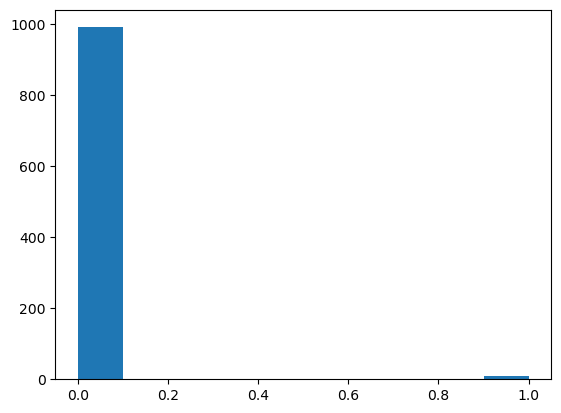

0.008


In [15]:
plt.hist(y)
plt.show()
print(np.sum(y)/len(y))

In [16]:
# Fit logistic regression model using statsmodels
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.045291
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Tue, 23 Apr 2024   Pseudo R-squ.:                 0.02798
Time:                        16:13:14   Log-Likelihood:                -45.291
converged:                       True   LL-Null:                       -46.594
Covariance Type:            nonrobust   LLR p-value:                    0.2715
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9011      0.834     -7.079      0.000      -7.535      -4.267
x1             0.2499      0.

# Try with a graph

In [698]:
# beta should be higher than c
n = 500 # number of nodes - 585 similar to c elegans
d = 0  # number of neighbouts to take into account

p = 1 / ( 0.5 * n )
sigma = np.log( p / ( 1 - p ) )    # intercept the higher the harder for creating edges 6

# 10 is how many degrees i want in my graph with p = 0.5
# more factor -> less edges only the sigma will influence

# Alternate between positive and negative for not populating the whole graph

factor = n * 2 # factor * n is the degree that p=0.5
alpha = -sigma / (factor)
beta  = -sigma / (factor)
n_iteration = 10
warm_up     = 1

alpha = 0.03
beta = 0.03
sigma = -6

params_dict = {
    "n": n,
    "p": p,
    "alpha": alpha,
    "beta": beta,
    "sigma": sigma,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

print(sigma, alpha, beta)

-6 0.03 0.03


In [699]:
graph_model = graph.GraphModel( n=n, p=d, alpha=alpha, beta=beta, sigma=sigma )

graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration, degree_dist_threshold=0.001, stability_window=2 )

iteration: 0
iteration: 1
iteration: 2
KS Statistic: 0.04
Degree Distribution Stable: False
Graph Converged: False




iteration: 3
KS Statistic: 0.04
Degree Distribution Stable: False
Graph Converged: False




iteration: 4
KS Statistic: 0.03
Degree Distribution Stable: False
Graph Converged: False




iteration: 5
KS Statistic: 0.048
Degree Distribution Stable: False
Graph Converged: False




iteration: 6
KS Statistic: 0.04
Degree Distribution Stable: False
Graph Converged: False




iteration: 7
KS Statistic: 0.026
Degree Distribution Stable: False
Graph Converged: False




iteration: 8
KS Statistic: 0.06
Degree Distribution Stable: False
Graph Converged: False




iteration: 9
KS Statistic: 0.04
Degree Distribution Stable: False
Graph Converged: False






In [700]:
print(len(graphs))

11


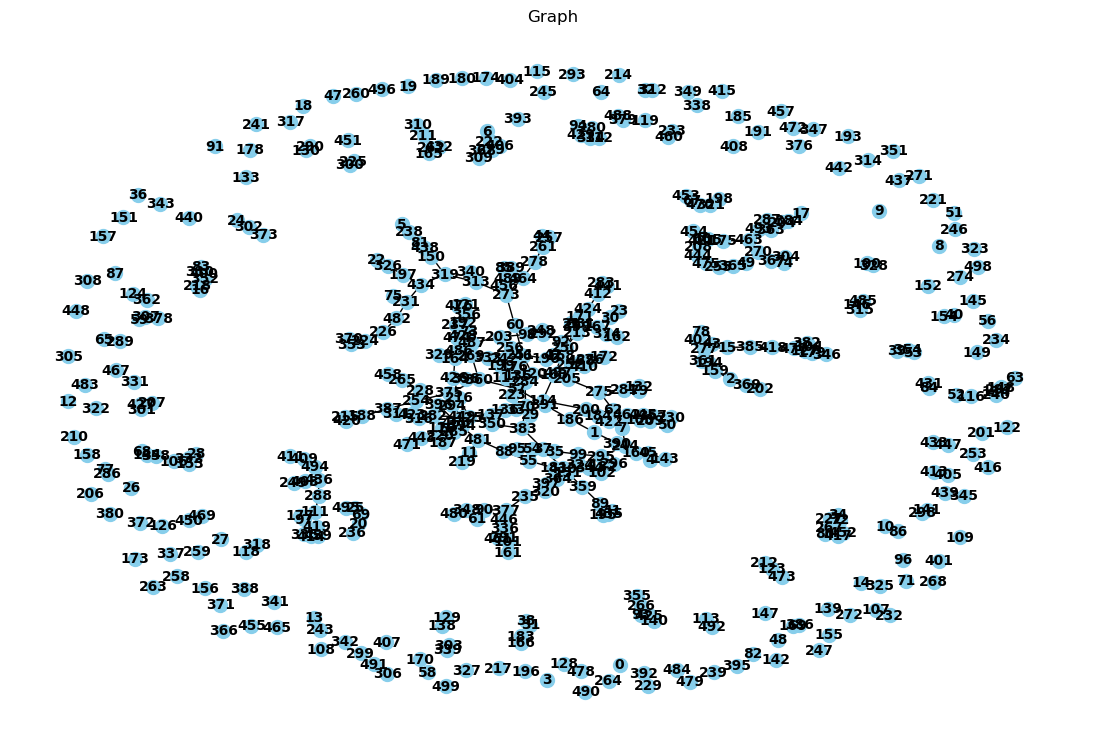

In [701]:
g = graphs[-1]
ut = utils.GraphUtils()
fig = ut.plot_graph_from_adjacency(adj_matrix=g, pos=None, title='Graph', size=(14, 9), node_size=100)

In [702]:
#ut.plot_graph_from_adjacency(adj_matrix=g, pos=None, title='Graph', size=(6, 3))

In [703]:
#ut.plot_graph_and_spectrum(adj_matrix=g, spectrum=s, pos=None, title=None, size=(6, 3))

In [704]:
#fig = ut.plot_degree_distribution(adj_matrix = g, title='Degree Distribution', size=(6, 3))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


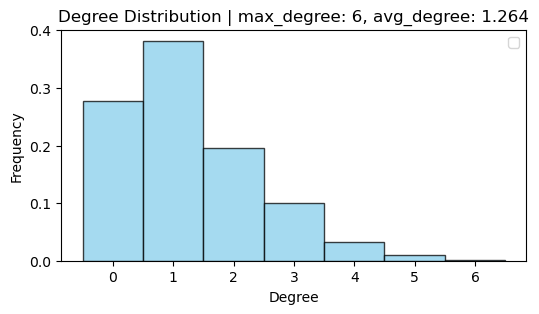

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


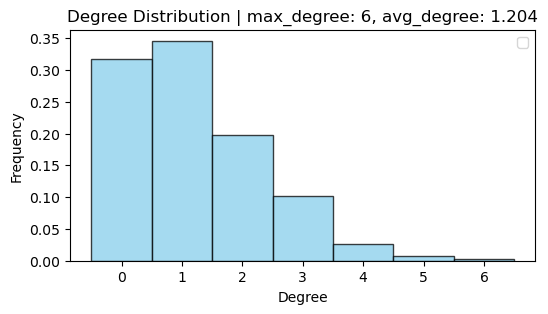

In [705]:
fig = ut.plot_degree_distribution(adj_matrix = graphs[-1], title='Degree Distribution', size=(6, 3))
fig = ut.plot_degree_distribution(adj_matrix = graphs[-2], title='Degree Distribution', size=(6, 3))

In [706]:
est = estimator.LogitRegEstimator(graphs[-2] , p=0)
features, _ = est.get_features_labels()

est = estimator.LogitRegEstimator(graphs[-1] , p=0)
_, labels = est.get_features_labels()

params, pvalue = est.estimate_parameters(features=features, labels=labels , l1_wt=1, alpha=0)
sigma,alpha,beta

                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.095     
Date:               2024-04-23 15:42 AIC:              3995.9946 
No. Observations:   124750           BIC:              4025.1968 
Df Model:           2                Log-Likelihood:   -1995.0   
Df Residuals:       124747           LL-Null:          -2204.8   
Converged:          1.0000           LLR p-value:      8.0452e-92
No. Iterations:     36.0000          Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -7.9776     0.1352   -59.0105   0.0000   -8.2426   -7.7127
x1        0.5964     0.0358    16.6606   0.0000    0.5262    0.6666
x2        0.6014     0.0421    14.3014   0.0000    0.5190    0.6839



(-6, 0.03, 0.03)

In [707]:
est = estimator.LogitRegEstimator(graphs[-2] , p=0)
features, labels = est.get_features_labels()
params, pvalue = est.estimate_parameters(features=features, labels=labels , l1_wt=1, alpha=0)
sigma, alpha, beta

                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.103     
Date:               2024-04-23 15:42 AIC:              3799.4715 
No. Observations:   124750           BIC:              3828.6737 
Df Model:           2                Log-Likelihood:   -1896.7   
Df Residuals:       124747           LL-Null:          -2114.8   
Converged:          1.0000           LLR p-value:      2.0767e-95
No. Iterations:     37.0000          Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -8.1349     0.1406   -57.8420   0.0000   -8.4106   -7.8593
x1        0.6141     0.0365    16.8309   0.0000    0.5426    0.6856
x2        0.6326     0.0429    14.7459   0.0000    0.5485    0.7167



(-6, 0.03, 0.03)

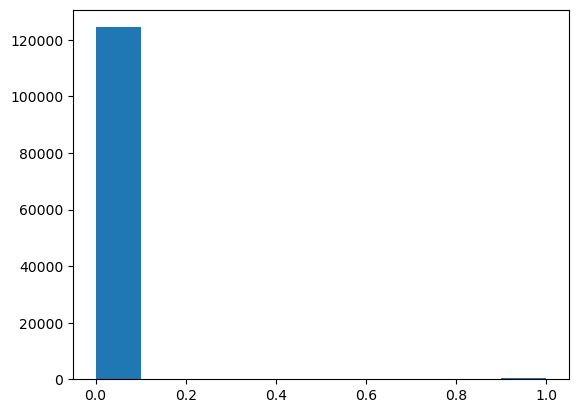

In [708]:
plt.hist(labels)
plt.show()

# MLE trying

In [361]:
import numpy as np
from scipy.optimize import minimize
from scipy.special import expit

# Mock implementations for degree computations
def get_sum_degrees(graph, vertex, p):
    # You should replace this with your actual implementation
    return np.sum(graph[vertex, :])

# Objective function to be minimized
def negative_log_likelihood(params, graph, n):
    alpha, beta, sigma = params
    likelihood = 0
    for i in range(n):
        for j in range(i + 1, n):
            if i != j:
                sum_deg_i = get_sum_degrees(graph, i, p)
                sum_deg_j = get_sum_degrees(graph, j, p)
                edge_prob = expit(alpha * sum_deg_i + beta * sum_deg_j + sigma)
                if graph[i, j] == 1:
                    likelihood += np.log(edge_prob + 1e-10)  # Add small constant to prevent log(0)
                else:
                    likelihood += np.log(1 - edge_prob + 1e-10)
    return -likelihood  # Minimize the negative likelihood

initial_params = [0, 0, -4]  # alpha, beta, sigma

# Run the optimization
result = minimize(negative_log_likelihood, initial_params, args=(g, n), method='L-BFGS-B')

print("Optimization Result:")
print("Alpha: {:.4f}, Beta: {:.4f}, Sigma: {:.4f}".format(*result.x))


Optimization Result:
Alpha: 0.5578, Beta: 0.4576, Sigma: -6.2481


In [360]:
alpha, beta, sigma

(0.038918202981106265, -0.038918202981106265, -3.8918202981106265)

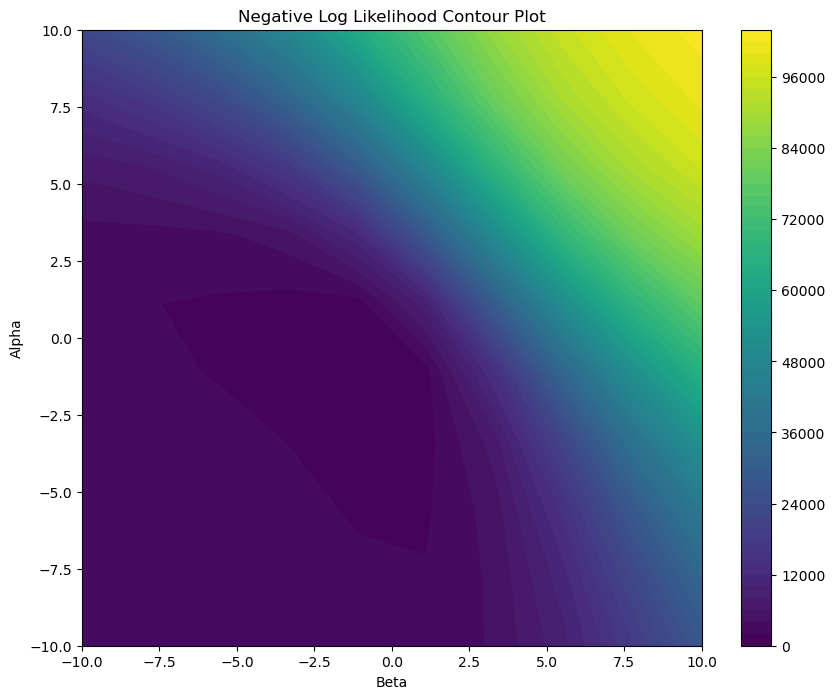

In [366]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import expit

def plot_negative_log_likelihood(alpha_range, beta_range, sigma, graph, n):
    alpha_values = np.linspace(*alpha_range, 10)
    beta_values = np.linspace(*beta_range, 10)
    Z = np.zeros((len(alpha_values), len(beta_values)))

    for i, alpha in enumerate(alpha_values):
        for j, beta in enumerate(beta_values):
            params = [alpha, beta, sigma]
            Z[i, j] = negative_log_likelihood(params, graph, n)

    Alpha, Beta = np.meshgrid(beta_values, alpha_values)
    plt.figure(figsize=(10, 8))
    cp = plt.contourf(Alpha, Beta, Z, levels=50, cmap='viridis')
    plt.colorbar(cp)
    plt.title('Negative Log Likelihood Contour Plot')
    plt.xlabel('Beta')
    plt.ylabel('Alpha')
    plt.show()

# Example parameters and graph setup
sigma_fixed = -3
alpha_range = (-10, 10)  # Example range for alpha
beta_range = (-10, 10)   # Example range for beta

# Plotting
plot_negative_log_likelihood(alpha_range, beta_range, sigma_fixed, g, n)
